## Importing Necessary Libraries

In [ ]:
!pip install "gensim==4.2.0"
!pip install "texthero==1.0.5"
!pip install unidecode
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')
import pandas as pd
import texthero as th
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd
from transformers import pipeline
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load labeled data
data = pd.read_csv('/content/bugs-2023-02-11 mozila core (1).csv')

## Importing the Mozilla Dataset

In [ ]:
df = pd.read_csv('bugs-2023-02-11 mozila core (1).csv')
df.head()

,Bug ID,Type,Priority,Assignee,Severity,Status,Opened,Closed,Resolution,Summary,Opened_Date,Closed_Date,Days_Taken
0,213,defect,P5,bugz,major,RESOLVED,14-04-1998 14:06,29-08-2017 14:22,FIXED,"showDocument(""javascript:...""); broken",14-04-1998,29-08-2017,7077
1,753,defect,--,joe,normal,RESOLVED,08-09-1998 21:07,21-07-2009 01:56,FIXED,Combined nsImage* & gfxImageFrame,08-09-1998,21-07-2009,3969
2,972,defect,P2,dbaron,normal,RESOLVED,01-10-1998 17:07,13-04-2007 21:46,FIXED,[FONT MAC] CSS font-weight: all font weights s...,01-10-1998,13-04-2007,3116
3,1107,defect,P2,peterl-retired,normal,RESOLVED,15-10-1998 19:50,16-01-2015 22:38,FIXED,"Once text-decoration is set to blink in CSSOM,...",15-10-1998,16-01-2015,5937
4,1118,defect,P2,brendan,normal,RESOLVED,16-10-1998 12:23,02-11-1999 02:24,FIXED,"Using content-type JS versioning is ""sticky""",16-10-1998,02-11-1999,382


## Dropping the Un-Necessary Columns¶

In [ ]:
df = df.drop(['Opened'], axis = 1)
df = df.drop(['Closed'], axis = 1)
df = df.drop(['Priority'], axis = 1)
df.head()

,Bug ID,Type,Assignee,Severity,Status,Resolution,Summary,Opened_Date,Closed_Date,Days_Taken
0,213,defect,bugz,major,RESOLVED,FIXED,"showDocument(""javascript:...""); broken",14-04-1998,29-08-2017,7077
1,753,defect,joe,normal,RESOLVED,FIXED,Combined nsImage* & gfxImageFrame,08-09-1998,21-07-2009,3969
2,972,defect,dbaron,normal,RESOLVED,FIXED,[FONT MAC] CSS font-weight: all font weights s...,01-10-1998,13-04-2007,3116
3,1107,defect,peterl-retired,normal,RESOLVED,FIXED,"Once text-decoration is set to blink in CSSOM,...",15-10-1998,16-01-2015,5937
4,1118,defect,brendan,normal,RESOLVED,FIXED,"Using content-type JS versioning is ""sticky""",16-10-1998,02-11-1999,382


## Getting the information of the Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Bug ID       10000 non-null  int64 
 1   Type         10000 non-null  object
 2   Assignee     10000 non-null  object
 3   Severity     9998 non-null   object
 4   Status       10000 non-null  object
 5   Resolution   10000 non-null  object
 6   Summary      10000 non-null  object
 7   Opened_Date  10000 non-null  object
 8   Closed_Date  10000 non-null  object
 9   Days_Taken   10000 non-null  object
dtypes: int64(1), object(9)
memory usage: 781.4+ KB


## Applying Preprocessing Techniques on Summary Column

In [ ]:
df['Summary']

0                  showDocument("javascript:..."); broken
1                       Combined nsImage* & gfxImageFrame
2       [FONT MAC] CSS font-weight: all font weights s...
3       Once text-decoration is set to blink in CSSOM,...
4            Using content-type JS versioning is "sticky"
                              ...                        
9995             working path's problem of FTP connection
9996    [gtk2] Changing GNOME2 theme doesn't apply unt...
9997    M17rc2 Mozilla crashes if I copy a input type=...
9998    remove the magic number 8 (kill ALLOW_SESSION_...
9999          15% Tp regression on redwood (gtk2 Firefox)
Name: Summary, Length: 10000, dtype: object

### 1. Tokenization

In [ ]:
def tokenize(column):

    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]

In [ ]:
df['Tokenized'] = df.apply(lambda x: tokenize(x['Summary']), axis=1)
df

,Bug ID,Type,Assignee,Severity,Status,Resolution,Summary,Opened_Date,Closed_Date,Days_Taken,Tokenized
0,213,defect,bugz,major,RESOLVED,FIXED,"showDocument(""javascript:...""); broken",14-04-1998,29-08-2017,7077,"[showDocument, javascript, broken]"
1,753,defect,joe,normal,RESOLVED,FIXED,Combined nsImage* & gfxImageFrame,08-09-1998,21-07-2009,3969,"[Combined, nsImage, gfxImageFrame]"
2,972,defect,dbaron,normal,RESOLVED,FIXED,[FONT MAC] CSS font-weight: all font weights s...,01-10-1998,13-04-2007,3116,"[FONT, MAC, CSS, all, font, weights, show, as,..."
3,1107,defect,peterl-retired,normal,RESOLVED,FIXED,"Once text-decoration is set to blink in CSSOM,...",15-10-1998,16-01-2015,5937,"[Once, is, set, to, blink, in, CSSOM, it, impo..."
4,1118,defect,brendan,normal,RESOLVED,FIXED,"Using content-type JS versioning is ""sticky""",16-10-1998,02-11-1999,382,"[Using, JS, versioning, is, sticky]"
...,...,...,...,...,...,...,...,...,...,...,...
9995,238847,defect,darin.moz,normal,RESOLVED,FIXED,working path's problem of FTP connection,26-03-2004,15-04-2004,20,"[working, path, problem, of, FTP, connection]"
9996,238854,defect,ginnchen+exoracle,minor,RESOLVED,FIXED,[gtk2] Changing GNOME2 theme doesn't apply unt...,26-03-2004,17-09-2004,175,"[Changing, theme, does, apply, until, restarti..."
9997,238906,defect,nobody,critical,RESOLVED,FIXED,M17rc2 Mozilla crashes if I copy a input type=...,27-03-2004,23-05-2004,57,"[Mozilla, crashes, if, I, copy, a, input, file..."
9998,238931,defect,mconnor,normal,RESOLVED,FIXED,remove the magic number 8 (kill ALLOW_SESSION_...,27-03-2004,07-04-2004,11,"[remove, the, magic, number, kill, const]"


### 2. Converting the Summary into Lowercase

In [ ]:
df['String_Tokenized'] = [' '.join(map(str, l)) for l in df['Tokenized']]
df['String_Tokenized'] = df['String_Tokenized'].apply(str.lower)
df['String_Tokenized']

0                          showdocument javascript broken
1                          combined nsimage gfximageframe
2       font mac css all font weights show as either n...
3       once is set to blink in cssom it impossible to...
4                           using js versioning is sticky
                              ...                        
9995               working path problem of ftp connection
9996    changing theme does apply until restarting moz...
9997    mozilla crashes if i copy a input file in conj...
9998                   remove the magic number kill const
9999                     tp regression on redwood firefox
Name: String_Tokenized, Length: 10000, dtype: object

### 3. Removing the Stopwords from the Summary

In [ ]:
stop_words = stopwords.words('english')
df['String_Tokenized'] = df['String_Tokenized'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df['String_Tokenized']

0                          showdocument javascript broken
1                          combined nsimage gfximageframe
2       font mac css font weights show either normal bold
3                         set blink cssom impossible turn
4                              using js versioning sticky
                              ...                        
9995                  working path problem ftp connection
9996              changing theme apply restarting mozilla
9997    mozilla crashes copy input file conjunction li...
9998                       remove magic number kill const
9999                        tp regression redwood firefox
Name: String_Tokenized, Length: 10000, dtype: object

### 4. Removing the Punctuations

In [ ]:
df["Summary_wo_Punctuation"] = df['String_Tokenized'].str.replace('[^\w\s]','')
df.head()

,Bug ID,Type,Assignee,Severity,Status,Resolution,Summary,Opened_Date,Closed_Date,Days_Taken,Tokenized,String_Tokenized,Summary_wo_Punctuation
0,213,defect,bugz,major,RESOLVED,FIXED,"showDocument(""javascript:...""); broken",14-04-1998,29-08-2017,7077,"[showDocument, javascript, broken]",showdocument javascript broken,showdocument javascript broken
1,753,defect,joe,normal,RESOLVED,FIXED,Combined nsImage* & gfxImageFrame,08-09-1998,21-07-2009,3969,"[Combined, nsImage, gfxImageFrame]",combined nsimage gfximageframe,combined nsimage gfximageframe
2,972,defect,dbaron,normal,RESOLVED,FIXED,[FONT MAC] CSS font-weight: all font weights s...,01-10-1998,13-04-2007,3116,"[FONT, MAC, CSS, all, font, weights, show, as,...",font mac css font weights show either normal bold,font mac css font weights show either normal bold
3,1107,defect,peterl-retired,normal,RESOLVED,FIXED,"Once text-decoration is set to blink in CSSOM,...",15-10-1998,16-01-2015,5937,"[Once, is, set, to, blink, in, CSSOM, it, impo...",set blink cssom impossible turn,set blink cssom impossible turn
4,1118,defect,brendan,normal,RESOLVED,FIXED,"Using content-type JS versioning is ""sticky""",16-10-1998,02-11-1999,382,"[Using, JS, versioning, is, sticky]",using js versioning sticky,using js versioning sticky


### 5. Removing ' " ' with blank space ' '

In [ ]:
df['Summary_wo_Punctuation'] = df['Summary_wo_Punctuation'].apply(lambda x: x.replace('"', ''))
df['Summary_wo_Punctuation']

0                          showdocument javascript broken
1                          combined nsimage gfximageframe
2       font mac css font weights show either normal bold
3                         set blink cssom impossible turn
4                              using js versioning sticky
                              ...                        
9995                  working path problem ftp connection
9996              changing theme apply restarting mozilla
9997    mozilla crashes copy input file conjunction li...
9998                       remove magic number kill const
9999                        tp regression redwood firefox
Name: Summary_wo_Punctuation, Length: 10000, dtype: object

### 5. Stemming the Summary Column

In [ ]:
# Use English stemmer.
stemmer = SnowballStemmer("english")
df['Summary_wo_Punctuation'] = df['Summary_wo_Punctuation'].str.split()
df['Stemmed'] = df['Summary_wo_Punctuation'].apply(lambda x: [stemmer.stem(y) for y in x])

### 6. Converting the Stemmed column into string type

In [ ]:
df['ListString'] = [' '.join(map(str, l)) for l in df['Stemmed']]
df

,Bug ID,Type,Assignee,Severity,Status,Resolution,Summary,Opened_Date,Closed_Date,Days_Taken,Tokenized,String_Tokenized,Summary_wo_Punctuation,Stemmed,ListString
0,213,defect,bugz,major,RESOLVED,FIXED,"showDocument(""javascript:...""); broken",14-04-1998,29-08-2017,7077,"[showDocument, javascript, broken]",showdocument javascript broken,"[showdocument, javascript, broken]","[showdocu, javascript, broken]",showdocu javascript broken
1,753,defect,joe,normal,RESOLVED,FIXED,Combined nsImage* & gfxImageFrame,08-09-1998,21-07-2009,3969,"[Combined, nsImage, gfxImageFrame]",combined nsimage gfximageframe,"[combined, nsimage, gfximageframe]","[combin, nsimag, gfximagefram]",combin nsimag gfximagefram
2,972,defect,dbaron,normal,RESOLVED,FIXED,[FONT MAC] CSS font-weight: all font weights s...,01-10-1998,13-04-2007,3116,"[FONT, MAC, CSS, all, font, weights, show, as,...",font mac css font weights show either normal bold,"[font, mac, css, font, weights, show, either, ...","[font, mac, css, font, weight, show, either, n...",font mac css font weight show either normal bold
3,1107,defect,peterl-retired,normal,RESOLVED,FIXED,"Once text-decoration is set to blink in CSSOM,...",15-10-1998,16-01-2015,5937,"[Once, is, set, to, blink, in, CSSOM, it, impo...",set blink cssom impossible turn,"[set, blink, cssom, impossible, turn]","[set, blink, cssom, imposs, turn]",set blink cssom imposs turn
4,1118,defect,brendan,normal,RESOLVED,FIXED,"Using content-type JS versioning is ""sticky""",16-10-1998,02-11-1999,382,"[Using, JS, versioning, is, sticky]",using js versioning sticky,"[using, js, versioning, sticky]","[use, js, version, sticki]",use js version sticki
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,238847,defect,darin.moz,normal,RESOLVED,FIXED,working path's problem of FTP connection,26-03-2004,15-04-2004,20,"[working, path, problem, of, FTP, connection]",working path problem ftp connection,"[working, path, problem, ftp, connection]","[work, path, problem, ftp, connect]",work path problem ftp connect
9996,238854,defect,ginnchen+exoracle,minor,RESOLVED,FIXED,[gtk2] Changing GNOME2 theme doesn't apply unt...,26-03-2004,17-09-2004,175,"[Changing, theme, does, apply, until, restarti...",changing theme apply restarting mozilla,"[changing, theme, apply, restarting, mozilla]","[chang, theme, appli, restart, mozilla]",chang theme appli restart mozilla
9997,238906,defect,nobody,critical,RESOLVED,FIXED,M17rc2 Mozilla crashes if I copy a input type=...,27-03-2004,23-05-2004,57,"[Mozilla, crashes, if, I, copy, a, input, file...",mozilla crashes copy input file conjunction li...,"[mozilla, crashes, copy, input, file, conjunct...","[mozilla, crash, copi, input, file, conjunct, ...",mozilla crash copi input file conjunct linebre...
9998,238931,defect,mconnor,normal,RESOLVED,FIXED,remove the magic number 8 (kill ALLOW_SESSION_...,27-03-2004,07-04-2004,11,"[remove, the, magic, number, kill, const]",remove magic number kill const,"[remove, magic, number, kill, const]","[remov, magic, number, kill, const]",remov magic number kill const


### 7. Applying TF-IDF using SkLearn

In [ ]:
data = []
for i in df['ListString']:
    review = ''.join(i)
    data.append(review)
print(data)

['showdocu javascript broken', 'combin nsimag gfximagefram', 'font mac css font weight show either normal bold', 'set blink cssom imposs turn', 'use js version sticki', 'dot border want round dot instead squar dot', 'string usag inconsist dom xpidl', 'doubl border invis divis space within doubl border', 'treat usemap attribut valu uri data rather cdata idref', 'error handl bug', 'text tabl display two line', 'remov debug robot build', 'work', 'push frame new page push proper', 'nsservicemanag handl differ iid share cid', 'februari night build unabl access netscap webmail', 'rx', 'rx cap', 'rx htmlparser', 'rollov grippi work unless toolbox start top window', 'make string wstring creat const param', 'need way regist instanc servic mgr', 'implement properti', 'nsjscontext call twice', 'code cleanup chang clsid classid', 'pp autoregistr problem mac', 'lack branch callback', 'file descriptor leak registri', 'bdo element implement', 'mlk nscomponentmanagerimpl', 'xpcom need shutdown', 'memb

In [ ]:
tfidf = TfidfVectorizer()

# get tf-df values
result = tfidf.fit_transform(data)

In [ ]:
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names_out(), tfidf.idf_):
    print(ele1, ':', ele2)

Streaming output truncated to the last 5000 lines.
checkmark : 9.111828078308406
checksameorigin : 9.517293186416572
child : 6.952343828955034
childiter : 9.517293186416572
children : 6.878235856801312
chines : 7.502390165874306
choic : 8.601002454542416
choke : 8.601002454542416
choos : 8.824146005856626
chooseoutputfil : 9.517293186416572
choppi : 9.517293186416572
chose : 9.517293186416572
chosen : 9.517293186416572
choti : 9.517293186416572
chromat : 9.517293186416572
chrome : 6.6840798423603545
chromeless : 9.517293186416572
chromeoverrid : 9.517293186416572
chromewindow : 9.517293186416572
chromezon : 9.517293186416572
chunk : 9.111828078308406
churn : 9.517293186416572
ci : 9.517293186416572
cid : 8.41868089774846
cidcreateinst : 9.517293186416572
cipher : 9.517293186416572
circuit : 9.517293186416572
circular : 9.517293186416572
circumst : 8.601002454542416
circumv : 8.824146005856626
cite : 9.517293186416572
citizen : 9.517293186416572
cjk : 8.013215789640297
claim : 8.6010024

In [ ]:
print('\nWord indexes:')
print(tfidf.vocabulary_)


Word indexes:
{'showdocu': 4591, 'javascript': 2145, 'broken': 423, 'combin': 679, 'nsimag': 3166, 'gfximagefram': 1651, 'font': 1450, 'mac': 2368, 'css': 850, 'weight': 5395, 'show': 4590, 'either': 1176, 'normal': 2766, 'bold': 386, 'set': 4524, 'blink': 368, 'cssom': 860, 'imposs': 1948, 'turn': 5121, 'use': 5295, 'js': 2159, 'version': 5333, 'sticki': 4780, 'dot': 1108, 'border': 396, 'want': 5372, 'round': 4383, 'instead': 2030, 'squar': 4744, 'string': 4809, 'usag': 5294, 'inconsist': 1966, 'dom': 1088, 'xpidl': 5516, 'doubl': 1109, 'invis': 2083, 'divis': 1057, 'space': 4701, 'within': 5434, 'treat': 5083, 'usemap': 5301, 'attribut': 254, 'valu': 5317, 'uri': 5286, 'data': 900, 'rather': 4149, 'cdata': 524, 'idref': 1888, 'error': 1247, 'handl': 1735, 'bug': 438, 'text': 4960, 'tabl': 4911, 'display': 1045, 'two': 5127, 'line': 2292, 'remov': 4260, 'debug': 921, 'robot': 4366, 'build': 442, 'work': 5444, 'push': 4102, 'frame': 1491, 'new': 2723, 'page': 3762, 'proper': 4065, 'n

In [ ]:
# display tf-idf values
print('\ntf-idf value:')
print(result)


tf-idf value:
  (0, 423)	0.44014653453908964
  (0, 2145)	0.4173160681627241
  (0, 4591)	0.7950586943027758
  (1, 1651)	0.6092733582552242
  (1, 3166)	0.6363852710293996
  (1, 679)	0.47307479507709854
  (2, 386)	0.36548623140250996
  (2, 2766)	0.3467463949748975
  (2, 1176)	0.38909563315121504
  (2, 4590)	0.2550820978791605
  (2, 5395)	0.4211315951222979
  (2, 850)	0.2438452680408431
  (2, 2368)	0.2534163996450809
  (2, 1450)	0.47821779250262914
  (3, 5121)	0.39350917081598746
  (3, 1948)	0.5018119566320176
  (3, 860)	0.5552714978233724
  (3, 368)	0.45581065238679525
  (3, 4524)	0.27793075673730805
  (4, 4780)	0.7051434262484061
  (4, 5333)	0.5045019455400785
  (4, 2159)	0.4089137224469497
  (4, 5295)	0.28467543441525356
  (5, 4744)	0.2923168857843905
  (5, 2030)	0.19084438294719142
  :	:
  (9996, 4317)	0.5368338741677955
  (9996, 4973)	0.5322158173126699
  (9996, 2619)	0.312059826870635
  (9996, 177)	0.47032088579826314
  (9996, 548)	0.3316212360262965
  (9997, 736)	0.3803986257281830

In [ ]:
print('\ntf-idf values in matrix form:')
ab = result.toarray()
print(ab)


tf-idf values in matrix form:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**EMOTION** **ANALYSIS**


In [ ]:


# Initialize emotion detection pipeline
emotion_classifier = pipeline('sentiment-analysis', model='j-hartmann/emotion-english-distilroberta-base')

# Function to get emotion label for each summary
def get_emotion_label(summary):
    result = emotion_classifier(summary)
    return result[0]['label']

# Apply emotion detection to each summary
data['Emotion'] = data['Summary'].apply(get_emotion_label)
print(data.head())

# Save the labeled data
data.to_csv('/content/bugs-2023-02-11 mozila core (1).csv', index=False)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

   Bug ID    Type Priority        Assignee Severity    Status  \
0     213  defect       P5            bugz    major  RESOLVED   
1     753  defect       --             joe   normal  RESOLVED   
2     972  defect       P2          dbaron   normal  RESOLVED   
3    1107  defect       P2  peterl-retired   normal  RESOLVED   
4    1118  defect       P2         brendan   normal  RESOLVED   

             Opened            Closed Resolution  \
0  14-04-1998 14:06  29-08-2017 14:22      FIXED   
1  08-09-1998 21:07  21-07-2009 01:56      FIXED   
2  01-10-1998 17:07  13-04-2007 21:46      FIXED   
3  15-10-1998 19:50  16-01-2015 22:38      FIXED   
4  16-10-1998 12:23  02-11-1999 02:24      FIXED   

                                             Summary Opened_Date Closed_Date  \
0             showDocument("javascript:..."); broken  14-04-1998  29-08-2017   
1                  Combined nsImage* & gfxImageFrame  08-09-1998  21-07-2009   
2  [FONT MAC] CSS font-weight: all font weights s...  01

In [ ]:
data

,Bug ID,Type,Priority,Assignee,Severity,Status,Opened,Closed,Resolution,Summary,Opened_Date,Closed_Date,Days_Taken,Emotion
0,213,defect,P5,bugz,major,RESOLVED,14-04-1998 14:06,29-08-2017 14:22,FIXED,"showDocument(""javascript:...""); broken",14-04-1998,29-08-2017,7077,anger
1,753,defect,--,joe,normal,RESOLVED,08-09-1998 21:07,21-07-2009 01:56,FIXED,Combined nsImage* & gfxImageFrame,08-09-1998,21-07-2009,3969,neutral
2,972,defect,P2,dbaron,normal,RESOLVED,01-10-1998 17:07,13-04-2007 21:46,FIXED,[FONT MAC] CSS font-weight: all font weights s...,01-10-1998,13-04-2007,3116,neutral
3,1107,defect,P2,peterl-retired,normal,RESOLVED,15-10-1998 19:50,16-01-2015 22:38,FIXED,"Once text-decoration is set to blink in CSSOM,...",15-10-1998,16-01-2015,5937,neutral
4,1118,defect,P2,brendan,normal,RESOLVED,16-10-1998 12:23,02-11-1999 02:24,FIXED,"Using content-type JS versioning is ""sticky""",16-10-1998,02-11-1999,382,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,238847,defect,--,darin.moz,normal,RESOLVED,26-03-2004 18:25,15-04-2004 18:27,FIXED,working path's problem of FTP connection,26-03-2004,15-04-2004,20,neutral
9996,238854,defect,--,ginnchen+exoracle,minor,RESOLVED,26-03-2004 19:56,17-09-2004 06:27,FIXED,[gtk2] Changing GNOME2 theme doesn't apply unt...,26-03-2004,17-09-2004,175,neutral
9997,238906,defect,--,nobody,critical,RESOLVED,27-03-2004 07:39,23-05-2004 17:28,FIXED,M17rc2 Mozilla crashes if I copy a input type=...,27-03-2004,23-05-2004,57,sadness
9998,238931,defect,P1,mconnor,normal,RESOLVED,27-03-2004 13:06,07-04-2004 23:28,FIXED,remove the magic number 8 (kill ALLOW_SESSION_...,27-03-2004,07-04-2004,11,neutral


Found 10022 unique tokens.
Epoch 1/50
125/125 [==============================] - 17s 128ms/step - loss: 0.7397 - accuracy: 0.8298 - val_loss: 0.5675 - val_accuracy: 0.8500
Epoch 2/50
125/125 [==============================] - 16s 125ms/step - loss: 0.5441 - accuracy: 0.8367 - val_loss: 0.5688 - val_accuracy: 0.8500
Epoch 3/50
125/125 [==============================] - 16s 125ms/step - loss: 0.4019 - accuracy: 0.8777 - val_loss: 0.5898 - val_accuracy: 0.8405
Epoch 4/50
125/125 [==============================] - 16s 124ms/step - loss: 0.2843 - accuracy: 0.9130 - val_loss: 0.7803 - val_accuracy: 0.8410
Epoch 5/50
125/125 [==============================] - 16s 126ms/step - loss: 0.2002 - accuracy: 0.9316 - val_loss: 0.8985 - val_accuracy: 0.8300
Epoch 6/50
125/125 [==============================] - 16s 126ms/step - loss: 0.1468 - accuracy: 0.9435 - val_loss: 1.0536 - val_accuracy: 0.8330
Epoch 7/50
125/125 [==============================] - 16s 125ms/step - loss: 0.1168 - accuracy: 0.9565 

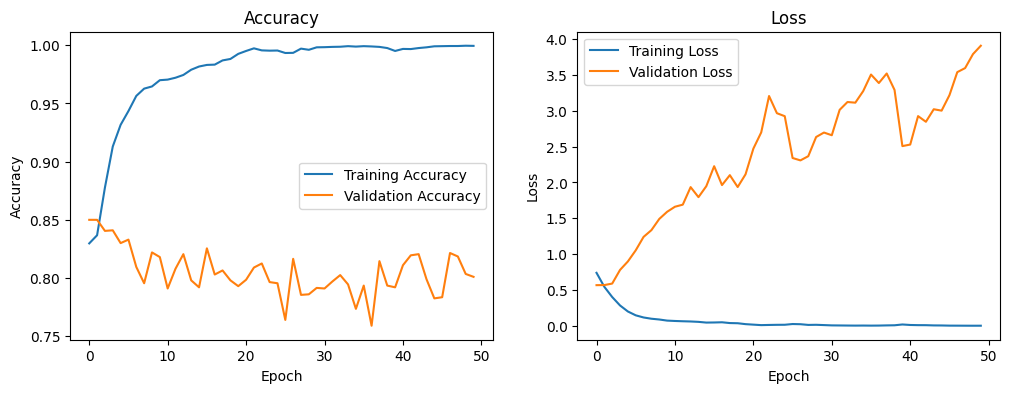

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load labeled data
data = pd.read_csv('/content/bugs-2023-02-11 mozila core (1).csv')

# Preprocess data
def preprocess_data(data, num_words=10000, max_length=100):
    tokenizer = Tokenizer(num_words=num_words)
    tokenizer.fit_on_texts(data['Summary'])
    sequences = tokenizer.texts_to_sequences(data['Summary'])
    word_index = tokenizer.word_index
    print(f'Found {len(word_index)} unique tokens.')

    data_pad = pad_sequences(sequences, maxlen=max_length)
    labels = pd.get_dummies(data['Emotion']).values

    return data_pad, labels, word_index

num_words = 20000  # Max number of words to consider in tokenizer
max_length = 100  # Max length of sequences
data_pad, labels, word_index = preprocess_data(data, num_words, max_length)

# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(data_pad, labels, test_size=0.2, random_state=42)

# Build CNN model
model = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=max_length),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(5),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(5),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(labels.shape[1], activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_data=(x_val, y_val))

# Evaluate model
val_loss, val_acc = model.evaluate(x_val, y_val, verbose=0)
print(f'Validation Accuracy: {val_acc * 100:.2f}%')

# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)


**EVALUATION** **MATRIX**

   Bug ID    Type Priority        Assignee Severity    Status  \
0     213  defect       P5            bugz    major  RESOLVED   
1     753  defect       --             joe   normal  RESOLVED   
2     972  defect       P2          dbaron   normal  RESOLVED   
3    1107  defect       P2  peterl-retired   normal  RESOLVED   
4    1118  defect       P2         brendan   normal  RESOLVED   

             Opened            Closed Resolution  \
0  14-04-1998 14:06  29-08-2017 14:22      FIXED   
1  08-09-1998 21:07  21-07-2009 01:56      FIXED   
2  01-10-1998 17:07  13-04-2007 21:46      FIXED   
3  15-10-1998 19:50  16-01-2015 22:38      FIXED   
4  16-10-1998 12:23  02-11-1999 02:24      FIXED   

                                             Summary Opened_Date Closed_Date  \
0             showDocument("javascript:..."); broken  14-04-1998  29-08-2017   
1                  Combined nsImage* & gfxImageFrame  08-09-1998  21-07-2009   
2  [FONT MAC] CSS font-weight: all font weights s...  01

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       anger       0.06      0.04      0.04        27
     disgust       0.09      0.15      0.11        26
        fear       0.00      0.00      0.00         7
         joy       0.00      0.00      0.00         4
     neutral       0.91      0.87      0.89      1700
     sadness       0.35      0.48      0.40       203
    surprise       0.19      0.18      0.19        33

    accuracy                           0.79      2000
   macro avg       0.23      0.25      0.23      2000
weighted avg       0.81      0.79      0.80      2000



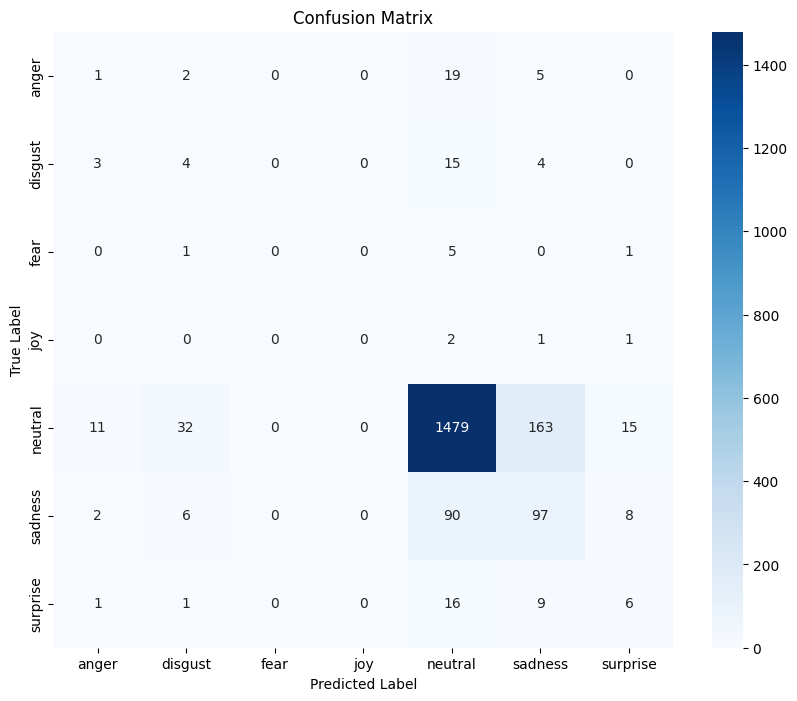

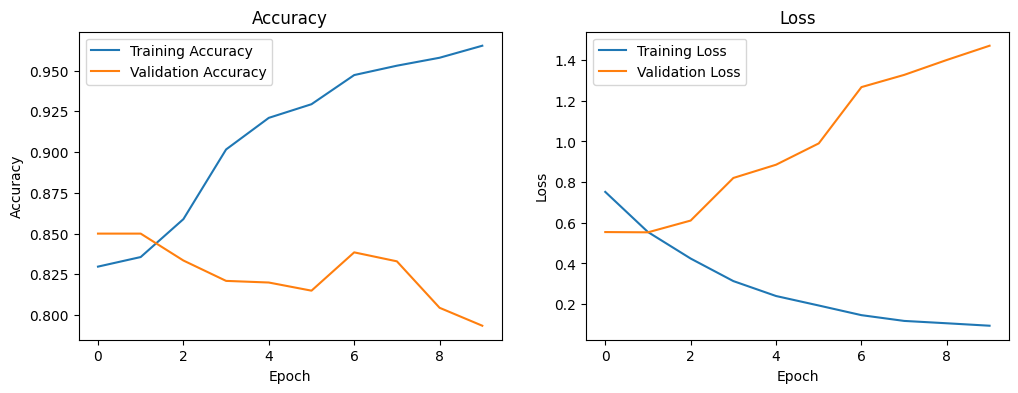

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline

# Load data
data = pd.read_csv('/content/bugs-2023-02-11 mozila core (1).csv')  # Replace with your actual dataset file path

# Initialize emotion detection pipeline
emotion_classifier = pipeline('sentiment-analysis', model='j-hartmann/emotion-english-distilroberta-base')

# Function to get emotion label for each summary
def get_emotion_label(summary):
    result = emotion_classifier(summary)
    return result[0]['label']

# Apply emotion detection to each summary
data['Emotion'] = data['Summary'].apply(get_emotion_label)
print(data.head())

# Save the labeled data
data.to_csv('labeled_summary_dataset.csv', index=False)

# Preprocess data
def preprocess_data(data, num_words=20000, max_length=100):
    tokenizer = Tokenizer(num_words=num_words)
    tokenizer.fit_on_texts(data['Summary'])
    sequences = tokenizer.texts_to_sequences(data['Summary'])
    word_index = tokenizer.word_index
    print(f'Found {len(word_index)} unique tokens.')

    data_pad = pad_sequences(sequences, maxlen=max_length)
    labels = pd.get_dummies(data['Emotion']).values

    return data_pad, labels, word_index

num_words = 20000  # Adjust vocabulary size here
max_length = 100  # Max length of sequences
data_pad, labels, word_index = preprocess_data(data, num_words, max_length)

# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(data_pad, labels, test_size=0.2, random_state=42)

# Build CNN model
model = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=max_length),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(5),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(5),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(labels.shape[1], activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_val, y_val))

# Evaluate model
val_loss, val_acc = model.evaluate(x_val, y_val, verbose=0)
print(f'Validation Accuracy: {val_acc * 100:.2f}%')

# Predict on validation data
y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Classification report
class_names = pd.get_dummies(data['Emotion']).columns
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print(report)

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)


In [ ]:
words_set = tfidf.get_feature_names_out()

print(words_set)

['aa' 'aaaa' 'aasb' ... 'zwj' 'zwnj' 'zwsp']


In [ ]:
df_tf_idf = pd.DataFrame(ab, columns = words_set)

df_tf_idf

,aa,aaaa,aasb,ab,abaseurl,abc,abend,abi,abil,abl,...,zlib,zliballoc,zombi,zone,zoom,zope,zparent,zwj,zwnj,zwsp
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_tf_idf['Severity'] = df['Severity']

In [ ]:
df2 = df_tf_idf.iloc[0:1000,:]

In [ ]:
df2 = df2.dropna()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Columns: 5573 entries, aa to Severity
dtypes: float64(5572), object(1)
memory usage: 42.5+ MB


In [ ]:
df2 = df_tf_idf.iloc[0:5000,:]

In [ ]:
df2 = df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4998 entries, 0 to 4999
Columns: 5573 entries, aa to Severity
dtypes: float64(5572), object(1)
memory usage: 212.5+ MB


# **SVM**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# load data
data  = df2
data  = data.values
feat  = np.asarray(data[:, 0:-1])
label = np.asarray(data[:, -1])

# split data into train & validation (70 -- 30)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3, random_state=42)

# model training
mdl = SVC()  # Support Vector Classifier
mdl.fit(xtrain, ytrain)

# evaluate the model
num_valid = np.size(xtest, 0)
y_pred = mdl.predict(xtest)
Acc = np.sum(ytest == y_pred) / num_valid
print("Accuracy:", 100 * Acc)

# plot convergence (not applicable for SVM)


Accuracy: 77.60000000000001


# **Logistic Regression**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Assuming df2 is your DataFrame containing the data

# Split data into features (feat) and labels (label)
feat = df2.iloc[:, :-1].values
label = df2.iloc[:, -1].values

# Split data into train & validation (70 -- 30)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3, random_state=42)

# Model training
mdl = LogisticRegression()  # Logistic Regression Classifier
mdl.fit(xtrain, ytrain)

# Evaluate the model
y_pred = mdl.predict(xtest)
accuracy = np.mean(y_pred == ytest) * 100
print("Accuracy:", accuracy)


Accuracy: 77.2


# **Random Forest**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming df2 is your DataFrame containing the data

# Split data into features (feat) and labels (label)
feat = df2.iloc[:, :-1].values
label = df2.iloc[:, -1].values

# Split data into train & validation (70 -- 30)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3, random_state=42)

# Model training
mdl = RandomForestClassifier()  # Random Forest Classifier
mdl.fit(xtrain, ytrain)

# Evaluate the model
y_pred = mdl.predict(xtest)
accuracy = np.mean(y_pred == ytest) * 100
print("Accuracy:", accuracy)


Accuracy: 77.26666666666667


# Decision tree

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Assuming df2 is your DataFrame containing the data

# Split data into features (feat) and labels (label)
feat = df2.iloc[:, :-1].values
label = df2.iloc[:, -1].values

# Split data into train & validation (70 -- 30)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3, random_state=42)

# Model training
mdl = DecisionTreeClassifier()  # Decision Tree Classifier
mdl.fit(xtrain, ytrain)

# Evaluate the model
y_pred = mdl.predict(xtest)
accuracy = np.mean(y_pred == ytest) * 100
print("Accuracy:", accuracy)


Accuracy: 69.0


EXTRA CODE

**CNN**

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming the dataset has 'Summary' and 'Priority' columns
# Drop rows with missing values
data = data.dropna(subset=['Summary', 'Priority'])

# Encode the target labels
label_encoder = LabelEncoder()
data['Priority'] = label_encoder.fit_transform(data['Priority'])

# Tokenize the summaries
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(data['Summary'])
sequences = tokenizer.texts_to_sequences(data['Summary'])

# Pad the sequences
max_length = 100
data_pad = pad_sequences(sequences, maxlen=max_length)

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(data_pad, data['Priority'], test_size=0.2, random_state=42)

# Convert labels to categorical
num_classes = len(label_encoder.classes_)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    Embedding(input_dim=20000, output_dim=128, input_length=max_length),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(5),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(5),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_val, y_val))


Epoch 1/10
125/125 [==============================] - 24s 173ms/step - loss: 1.2911 - accuracy: 0.5584 - val_loss: 1.2466 - val_accuracy: 0.5520
Epoch 2/10
125/125 [==============================] - 20s 161ms/step - loss: 1.1813 - accuracy: 0.5645 - val_loss: 1.2418 - val_accuracy: 0.5520
Epoch 3/10
125/125 [==============================] - 23s 183ms/step - loss: 0.9857 - accuracy: 0.6219 - val_loss: 1.4582 - val_accuracy: 0.5375
Epoch 4/10
125/125 [==============================] - 16s 124ms/step - loss: 0.7739 - accuracy: 0.7019 - val_loss: 1.6760 - val_accuracy: 0.4720
Epoch 5/10
125/125 [==============================] - 16s 125ms/step - loss: 0.6066 - accuracy: 0.7645 - val_loss: 2.0354 - val_accuracy: 0.4865
Epoch 6/10
125/125 [==============================] - 16s 127ms/step - loss: 0.4670 - accuracy: 0.8141 - val_loss: 2.4441 - val_accuracy: 0.4510
Epoch 7/10
125/125 [==============================] - 16s 126ms/step - loss: 0.3606 - accuracy: 0.8470 - val_loss: 3.0585 - val_ac

Validation Accuracy: 39.70%
63/63 [==============================] - 2s 24ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          --       0.62      0.50      0.55      1104
          P1       0.28      0.19      0.23       177
          P2       0.12      0.19      0.15       195
          P3       0.30      0.37      0.33       450
          P4       0.05      0.13      0.07        53
          P5       0.00      0.00      0.00        21

    accuracy                           0.40      2000
   macro avg       0.23      0.23      0.22      2000
weighted avg       0.45      0.40      0.42      2000



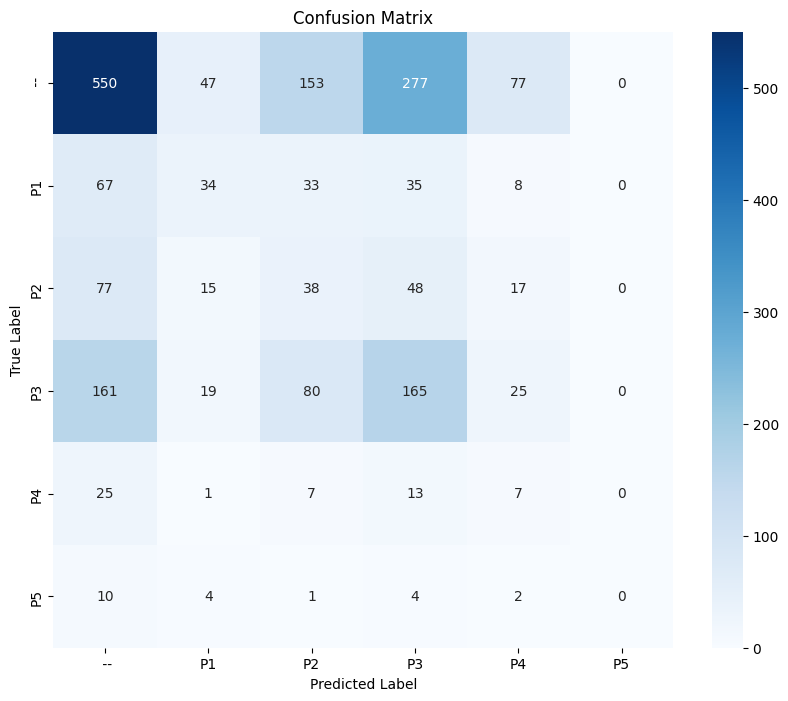

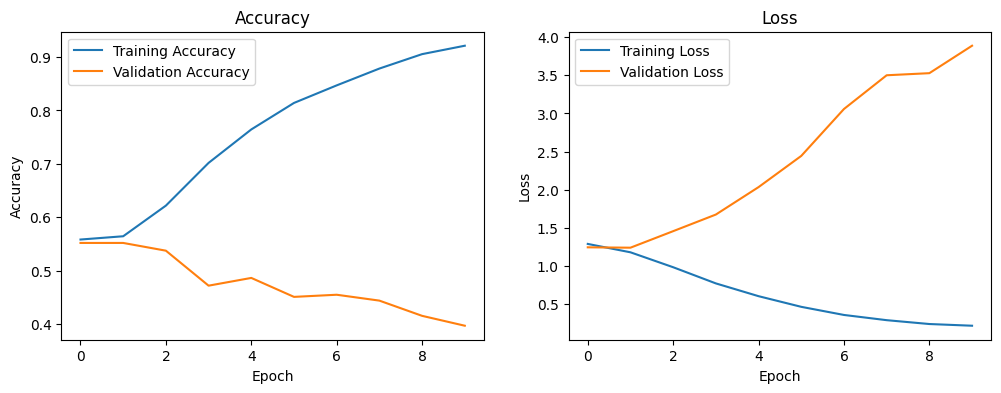

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate model
val_loss, val_acc = model.evaluate(x_val, y_val, verbose=0)
print(f'Validation Accuracy: {val_acc * 100:.2f}%')

# Predict on validation data
y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Classification report
report = classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_)
print(report)

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)
